### Plots a regime diagram for where we expect top-down vs intermediate vs bottom-up freezing

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import sys

sys.path.append('../')#Make directory above visible to import our custom setup_model
import eos_setup_model

import thermal_history as th


In [65]:
#Values in parameter search for sulphur composition, cmb radius
S_array     = np.linspace(0,0.15,31)
r_cmb_array = np.array([300,500,800]) #km

In [78]:
#Begin the loop

result = np.zeros((len(r_cmb_array), len(S_array)))

for it,r_cmb in enumerate(r_cmb_array):

    prm = th.model.Parameters((f'../{r_cmb}km/{r_cmb}_params.py',))

    #Begin loops
    for j,S in enumerate(S_array):
        prm.conc_l[0] = S  #Set composition


        #Setup model
        prm.stable_layer = False
        model = eos_setup_model.setup_model(prm, core_method='leeds', verbose=False)

        #get radial profiles
        profiles = model.core.profiles

        r, T, Tm = profiles['r'], profiles['T'], profiles['Tm']

        #Adiabatic gradient is dependent on the temperature but T(r)/T is constant in time.
        #where T is taken at any fixed radius. We can use this to set the adiabat to
        #The melting temperature at any radius and check what freezing regimes we would get
        
    
        CMB_snow_zone     = True
        bottom_up         = False
        intermediate_snow = False

        regimes = ['bottom-up', 'intermediate','top-down']

        regime = 2
        #First check for snow zones that always extend to CMB
        #Iterate across all radii, starting at CMB.
        for i in range(r.size-1,-1,-1):

            Ta = T/T[i] * Tm[i]

            #Temperature below should not be below Tm, and temperature above should not be above Tm.
            if (i>0 and np.min(Ta[:i] - Tm[:i]) < 0) or (i<r.size-1 and np.max(Ta[i:] - Tm[i:]) > 0):
                CMB_snow_zone = False  #Temperature below intersection of T/Tm is also below Tm.


        if CMB_snow_zone == False:
        
            #Next possibility, check for bottom-up freezing, starting at r=0
            bottom_up = True
            regime = 0
            for i in range(r.size):

                Ta = T/T[i] * Tm[i]

                #Temperature below should not be above Tm, and temperature above should not be below Tm.
                if (i>0 and np.min(Ta[:i] - Tm[:i]) > 0) or (i<r.size-1 and np.max(Ta[i:] - Tm[i:])) < 0:
                    bottom_up = False

            #If it doesn't fit conditions for the others, it must be intermediate.
            if bottom_up == False:
                regime = 1
                intermediate_snow = True

        result[it,j] = regime

        print(f'rc = {r_cmb} km and S={S*100} wt% gives {regimes[regime]}')

rc = 300 km and S=0.0 wt% gives bottom-up
rc = 300 km and S=0.5 wt% gives bottom-up
rc = 300 km and S=1.0 wt% gives bottom-up
rc = 300 km and S=1.5 wt% gives bottom-up
rc = 300 km and S=2.0 wt% gives bottom-up
rc = 300 km and S=2.5 wt% gives bottom-up
rc = 300 km and S=3.0 wt% gives intermediate
rc = 300 km and S=3.5000000000000004 wt% gives top-down
rc = 300 km and S=4.0 wt% gives top-down
rc = 300 km and S=4.5 wt% gives top-down
rc = 300 km and S=5.0 wt% gives top-down
rc = 300 km and S=5.5 wt% gives top-down
rc = 300 km and S=6.0 wt% gives top-down
rc = 300 km and S=6.5 wt% gives top-down
rc = 300 km and S=7.000000000000001 wt% gives top-down
rc = 300 km and S=7.5 wt% gives top-down
rc = 300 km and S=8.0 wt% gives top-down
rc = 300 km and S=8.5 wt% gives top-down
rc = 300 km and S=9.0 wt% gives top-down
rc = 300 km and S=9.5 wt% gives top-down
rc = 300 km and S=10.0 wt% gives top-down
rc = 300 km and S=10.5 wt% gives top-down
rc = 300 km and S=11.0 wt% gives top-down
rc = 300 km and

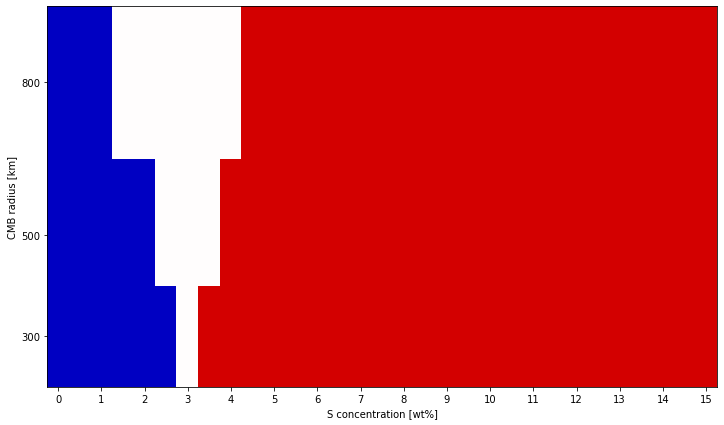

In [77]:
plt.figure(figsize=(12,7))
skip=2
plt.pcolor(S_array, r_cmb_array, result-1, cmap='seismic', vmin=-1.5, vmax=1.5)
plt.yticks(r_cmb_array)
plt.xticks(S_array[::-skip])
plt.gca().set_xticklabels([f'{x*100:.0f}' for x in S_array[::-skip]])
plt.xlabel('S concentration [wt%]')
plt.ylabel('CMB radius [km]')
plt.show()

#Red is top-down, white is intermediate, blue is bottom up